In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from math import sqrt

In [ ]:
df = pd.read_csv("sparse.csv")
arr = df.values
print(arr)

[[ 93  88  93   0 185]
 [ 89  91  90   0 180]
 [ 96  98 100   0 196]
 [ 73  66  70   1 142]
 [ 53  46  55   0 101]
 [ 69  74  77   0 149]
 [ 47  56  60   1 115]
 [ 87  79  90   0 175]
 [ 79  70  88   0 164]
 [ 69  70  73   0 141]
 [ 70  65  74   0 141]
 [ 93  95  91   1 184]
 [ 79  80  73   1 152]
 [ 70  73  78   0 148]
 [ 93  89  96   1 192]
 [ 78  75  68   0 147]
 [ 81  90  93   0 183]
 [ 88  92  86   1 177]
 [ 78  83  77   1 159]
 [ 82  86  90   0 177]
 [ 86  82  89   1 175]
 [ 78  83  85   0 175]
 [ 76  83  71   0 149]
 [ 96  93  95   1 192]]


In [ ]:
x_ = arr[:, 0:len(arr[0])-1]
y_ = arr[:, len(arr[0])-1]
print(x_)
print(y_)

[[ 93  88  93   0]
 [ 89  91  90   0]
 [ 96  98 100   0]
 [ 73  66  70   1]
 [ 53  46  55   0]
 [ 69  74  77   0]
 [ 47  56  60   1]
 [ 87  79  90   0]
 [ 79  70  88   0]
 [ 69  70  73   0]
 [ 70  65  74   0]
 [ 93  95  91   1]
 [ 79  80  73   1]
 [ 70  73  78   0]
 [ 93  89  96   1]
 [ 78  75  68   0]
 [ 81  90  93   0]
 [ 88  92  86   1]
 [ 78  83  77   1]
 [ 82  86  90   0]
 [ 86  82  89   1]
 [ 78  83  85   0]
 [ 76  83  71   0]
 [ 96  93  95   1]]
[185 180 196 142 101 149 115 175 164 141 141 184 152 148 192 147 183 177
 159 177 175 175 149 192]


In [ ]:
def adagrad(x, y, epsilon, alpha, max_iterations):
    x = np.column_stack((np.ones(len(x), dtype = int), x))
    y = y.reshape(-1, 1)
    theta = np.zeros(((x.shape)[1],1))
    v = np.zeros((x.shape[1],1))
    m = (x.shape)[0]
    cost_list = []
    hypo = x_updated @ theta
    for i in range(max_iterations):
        grad_theta = (1/m) * (x.T @ (hypo - y))
        v += grad_theta ** 2
        theta -= (alpha/(np.sqrt(v) + epsilon)) * grad_theta
        hypo = x @ theta
        difference = hypo - y
        cost = (1/(2*m)) *np.linalg.norm((difference)**2)
        cost_list.append(cost)
        if i>0:
            if np.linalg.norm([grad_theta]) < 0.001:
                break
            elif np.absolute(cost_list[i] - cost_list[i-1]) < 0.001:
                break
    return theta, cost_list

theta, cost_list = adagrad(x_, y_, 1e-8, 0.2, 10000)
x = np.column_stack((np.ones(len(x_), dtype = int), x_))
y_predicted = x @ theta
print(r2_score(y_, y_predicted))
#print(y_predicted)

0.9781275860215872


<function matplotlib.pyplot.show(*args, **kw)>

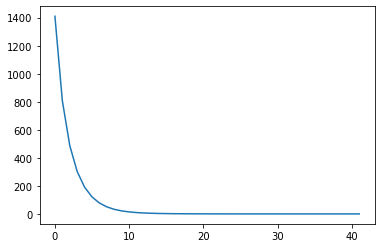

In [ ]:
plt.plot(list(range(len(cost_list))) , cost_list)
plt.show

In [ ]:
def RMSProp(x, y, epsilon, alpha, beta, max_iterations):
    x = np.column_stack((np.ones(len(x), dtype = int), x))
    y = y.reshape(-1, 1)
    theta = np.zeros(((x.shape)[1],1))
    v = np.zeros((x.shape[1],1))
    m = (x.shape)[0]
    cost_list = []
    hypo = x_updated @ theta
    for i in range(max_iterations):
        grad_theta = (1/m) * (x.T @ (hypo - y))
        v = beta * v + (1 - beta) * (grad_theta ** 2)
        theta -= (alpha/(np.sqrt(v) + epsilon)) * grad_theta
        hypo = x @ theta
        difference = hypo - y
        cost = (1/(2*m)) *np.linalg.norm((difference)**2)
        cost_list.append(cost)
        if i>0:
            if np.linalg.norm([grad_theta]) < 0.001:
                break
            elif np.absolute(cost_list[i] - cost_list[i-1]) < 0.001:
                break
    return theta, cost_list

theta, cost_list = RMSProp(x_, y_, 1e-8, 0.2, 0.98, 10000)
x = np.column_stack((np.ones(len(x_), dtype = int), x_))
y_predicted = x @ theta
print(r2_score(y_, y_predicted))
#print(y_predicted)

0.9783938657093575


<function matplotlib.pyplot.show(*args, **kw)>

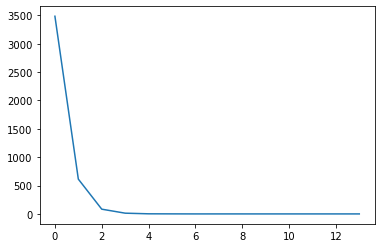

In [ ]:
plt.plot(list(range(len(cost_list))) , cost_list)
plt.show

In [ ]:
def Adam(x, y, epsilon, alpha, beta1, beta2, max_iterations):
    x = np.column_stack((np.ones(len(x), dtype = int), x))
    y = y.reshape(-1, 1)
    theta = np.zeros(((x.shape)[1],1))
    v = np.zeros((x.shape[1],1))
    m = np.zeros((x.shape[1],1))
    w = (x.shape)[0]
    cost_list = []
    hypo = x_updated @ theta
    for i in range(max_iterations):
        grad_theta = (1/w)*(x.T @ (hypo - y))
        m = beta1 * m + (1 - beta1) * grad_theta
        m = m / (1 - (beta1 ** (i + 1)))
        v = beta2 * v + (1 - beta2) * (grad_theta ** 2)
        v = v / (1 - (beta2 ** (i + 1)))
        theta -= (alpha/(np.sqrt(v) + epsilon)) * m
        hypo = x @ theta
        difference = hypo - y
        cost = (1/(2*w)) *np.linalg.norm((difference)**2)
        cost_list.append(cost)
        if i>0:
            if np.linalg.norm([grad_theta]) < 0.001:
                break
            elif np.absolute(cost_list[i] - cost_list[i-1]) < 0.001:
                break
    return theta, cost_list
theta, cost_list = Adam(x_, y_, 1e-8, 0.5, 0.5, 0.95, 10000)
x = np.column_stack((np.ones(len(x_), dtype = int), x_))
y_predicted = x @ theta
print(r2_score(y_, y_predicted))
#print(y_predicted)

0.9763851213428447


<function matplotlib.pyplot.show(*args, **kw)>

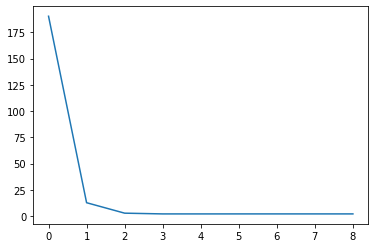

In [ ]:
plt.plot(list(range(len(cost_list))) , cost_list)
plt.show